<a href="https://colab.research.google.com/github/minhthy1016/minh-thy/blob/main/predict_bank_churns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description


**Background & Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

As a Data scientist at Thera bank, we need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

We need to identify the best possible model that will give the required performance




**Objective**
- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank


**Data Dictionary**

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
 
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
 
- Customer_Age: Age in Years
 
- Gender: Gender of the account holder
 
- Dependent_count: Number of dependents
 
- Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
 
- Marital_Status: Marital Status of the account holder
 
- Income_Category: Annual Income Category of the account holder
 
- Card_Category: Type of Card
 
- Months_on_book: Period of relationship with the bank
 
- Total_Relationship_Count: Total no. of products held by the customer
 
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
 
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
 
- Credit_Limit: Credit Limit on the Credit Card
 
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
 
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
 
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
 
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
 
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
 
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
 
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent
 

Data source: https://www.kaggle.com/sakshigoyal7/credit-card-customers


**Import the libraries**

In [ ]:
import pandas as pd 
import numpy as np
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....

#Visualization of the data....
from matplotlib import pyplot as plt 
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate


# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

!pip install lightgbm
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    plot_roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.preprocessing import StandardScaler
# To be used for missing value imputation
from sklearn.impute import SimpleImputer


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# To supress warnings
import warnings
warnings.filterwarnings("ignore")
# date time
from datetime import datetime




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_churns/BankChurners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                              0.000                                                                                    
1                                              0.000                                                                                    
2                                              0.000                                                                                    
3                                              0.000                                                                                    
4                                              0.000                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                              1.000                                                                                   
1                                              1.000                                                                                   
2                                              1.000                                                                                   
3                                              1.000                                                                                   
4                                              1.000

In [ ]:
# Dropping the last two columns and the client number column
df = df.iloc[:,1:-2]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Data Types & Data Summary

In [ ]:
#checkling NaN values
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

No missing data. 

Let's check the number of unique values in each column

**Unique values for Category columns**

In [ ]:
df.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

**Unique values for Numberic columns**

In [ ]:
df.select_dtypes(exclude="object").nunique()

Customer_Age                  45
Dependent_count                6
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

Age has only 45 unique values i.e. most of the customers are of similar age

**Numerical column statistics**

In [ ]:
#df describe Numberical columns. Should LabelEncoder Categorical columns later
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count     10127.000        10127.000       10127.000   
mean         46.326            2.346          35.928   
std           8.017            1.299           7.986   
min          26.000            0.000          13.000   
25%          41.000            1.000          31.000   
50%          46.000            2.000          36.000   
75%          52.000            3.000          40.000   
max          73.000            5.000          56.000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                 10127.000               10127.000   
mean                      3.813                   2.341   
std                       1.554                   1.011   
min                       1.000                   0.000   
25%                       3.000                   2.000   
50%                       4.000                   2.000   
75%                       5.000                   3.000   
max                       6.000                   6.000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count              10127.000     10127.000            10127.000   
mean                   2.455      8631.954             1162.814   
std                    1.106      9088.777              814.987   
min                    0.000      1438.300                0.000   
25%                    2.000      2555.000              359.000   
50%                    2.000      4549.000             1276.000   
75%                    3.000     11067.500             1784.000   
max                    6.000     34516.000             2517.000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count        10127.000             10127.000        10127.000       10127.000   
mean          7469.140                 0.760         4404.086          64.859   
std           9090.685                 0.219         3397.129          23.473   
min              3.000                 0.000          510.000          10.000   
25%           1324.500                 0.631         2155.500          45.000   
50%           3474.000                 0.736         3899.000          67.000   
75%           9859.000                 0.859         4741.000          81.000   
max          34516.000                 3.397        18484.000         139.000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count            10127.000              10127.000  
mean                 0.712                  0.275  
std                  0.238                  0.276  
min                  0.000                  0.000  
25%                  0.582                  0.023  
50%                  0.702                  0.176  
75%                  0.818                  0.503  
max                  3.714                  0.999

- Mean value for the Customer Age column is approx 46 and the median is also 46. This shows that majority of the customers are under 46 years of age.
- Dependent Count column has mean and median of ~2
- Months on Book column has mean and median of 36 months. Minimum value is 13 months, showing that the dataset captures data for customers with the bank at least once for ~ 5 years
- Total Relationship Count has mean of ~4
- Credit Limit has a wide range of 1.4K to 34.5K, the median being 4.5K, way less than the mean 8.6K
- Total Transaction Count has mean of ~65.

**Categorical column statistics**

In [ ]:
# let's view the statistical summary of the categorical columns in the data
df.describe(include="object").T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

**Distribution of category columns statistics**


In [ ]:
# Below function prints unique value counts and percentages for the category/object type variables


def category_unique_value():
    for cat_cols in (
        df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                df[cat_cols].value_counts(),                          # Count
                df[cat_cols].value_counts(normalize=True) * 100,      # Percentage
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
   Count  Percentage
F   5358      52.908
M   4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        3128      30.888
High School     2013      19.878
Unknown         1519      15.000
Uneducated      1487      14.6

- The target variable Attrition Flag has Existing to Attrited ratio of 83.9 : 16.1. There is imbalance in the dataset. 
- ~93% customers are having Blue Card
- Income Category has a value abc for 10% records, which we'll change to Unknown

** This is classification problem with 2 classes:

- 1: Existing Customer (possitive cases)
- 2: Attrited Customer  (negative cases)

We have 1626 negative cases and 8500 postive cases. There is imbalance in the dataset between classes. In order to build prediction models for customer churn rate, some metrics will be used: 
- Accuracy
- Precision and recall
- ROC and AUC **

**Visualize The Correlation Between Dependent And Independent Dependent Features**

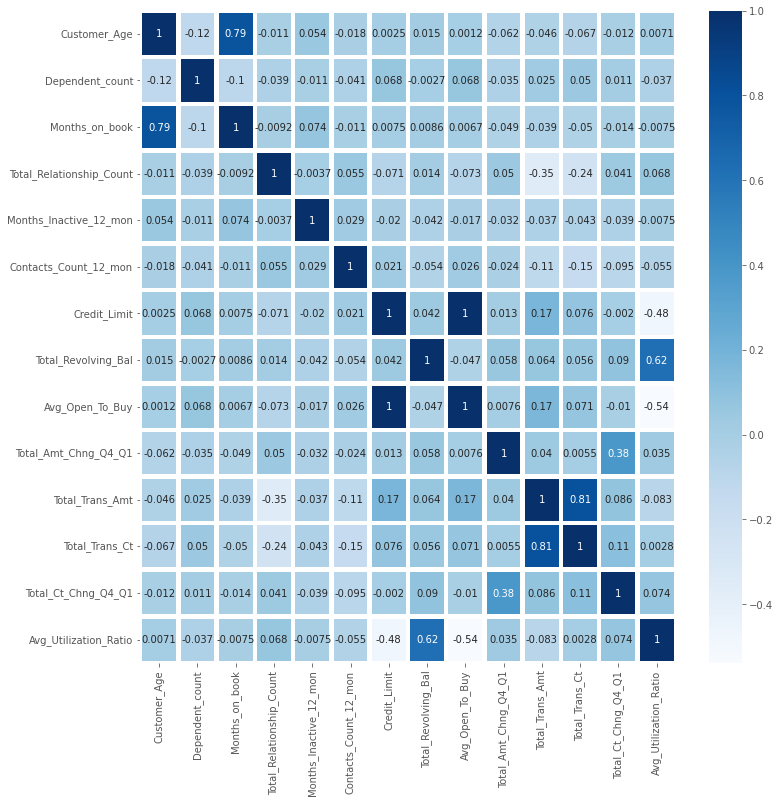

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(12,12))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')

- Credit Limit and Average Open to Buy have 100% collinearity
- Months on book and Customer Age have quite strong correlation
- Average Utilization Ration and Total Revolving Balance are also a bit correlated it appears
- Attrition Flag does not have highly strong correlation with any of the numeric variables
- Customer Churn appears to be uncorrelated with Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit, we'll remove these from dataset

**Actionable Insights and Recommendations**

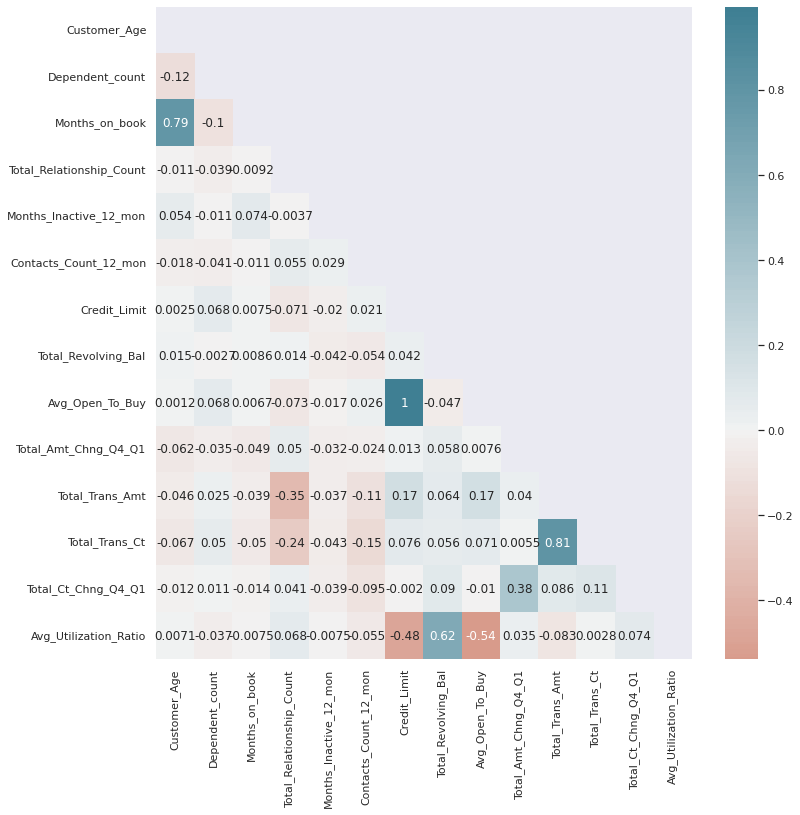

In [ ]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={"figure.figsize": (12, 12)})

sns.heatmap(
    df.corr(),
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    mask=mask,
    center=0,
)
plt.show()

from the 2 grapth, the most important features to understand customer credit card churn, are:
- Total Transaction Count
- Total Transaction Amount
- Total Revolving Balance
- Total Amount Change Q4 to Q1
- Total Count Change Q4 to Q1
- Total Relationship Count

# Pre EDA-Data processing*

**Treating missing values in Education Level and Marital Status**

_Education_Level_ and _Marital_Status_ has imbalance data, and _Income_Category has _abc_ value. So, we are filling in the data with Unknown. Thus, the treatment can be done on the overall dataset. 

*However, normally the missing value treatment should be done after splitting the data into Train, Validation and Test sets.*

In [ ]:
df["Education_Level"] = df["Education_Level"].fillna("Unknown")
df["Marital_Status"] = df["Marital_Status"].fillna("Unknown")
df.loc[df[df["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"

Checking operation outcome for category_unique_value

In [ ]:
category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
   Count  Percentage
F   5358      52.908
M   4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        3128      30.888
High School     2013      19.878
Unknown         1519      15.000
Uneducated      1487      14.6

In [ ]:
# let's check for missing values in the data
df_null_summary = pd.concat(
    [df.isnull().sum(), df.isnull().sum() * 100 / df.isnull().count()], axis=1
)
df_null_summary.columns = ["Null Record Count", "Percentage of Null Records"]
df_null_summary[df_null_summary["Null Record Count"] > 0].sort_values(
    by="Percentage of Null Records", ascending=False
).style.background_gradient(cmap="YlOrRd")

All the null data values have been treated along with the incorrect/junk data in Income Category column

**Data type conversions**

Converting the data type of the category variables from object/float to category

In [ ]:
category_columns= df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
df[category_columns] = df[category_columns].astype("category")

**Standardizing column names**

Removing the spaces from column names, and standardizing the column names to lower case

In [ ]:
df.columns = [i.replace(" ", "_").lower() for i in df.columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

# Exploratory Data Analysis (EDA)

**Checking Outliers distributions**

In [ ]:
df.describe().T

count     mean      std      min      25%  \
customer_age             10127.000   46.326    8.017   26.000   41.000   
dependent_count          10127.000    2.346    1.299    0.000    1.000   
months_on_book           10127.000   35.928    7.986   13.000   31.000   
total_relationship_count 10127.000    3.813    1.554    1.000    3.000   
months_inactive_12_mon   10127.000    2.341    1.011    0.000    2.000   
contacts_count_12_mon    10127.000    2.455    1.106    0.000    2.000   
credit_limit             10127.000 8631.954 9088.777 1438.300 2555.000   
total_revolving_bal      10127.000 1162.814  814.987    0.000  359.000   
avg_open_to_buy          10127.000 7469.140 9090.685    3.000 1324.500   
total_amt_chng_q4_q1     10127.000    0.760    0.219    0.000    0.631   
total_trans_amt          10127.000 4404.086 3397.129  510.000 2155.500   
total_trans_ct           10127.000   64.859   23.473   10.000   45.000   
total_ct_chng_q4_q1      10127.000    0.712    0.238    0.000    0.582   
avg_utilization_ratio    10127.000    0.275    0.276    0.000    0.023   

                              50%       75%       max  
customer_age               46.000    52.000    73.000  
dependent_count             2.000     3.000     5.000  
months_on_book             36.000    40.000    56.000  
total_relationship_count    4.000     5.000     6.000  
months_inactive_12_mon      2.000     3.000     6.000  
contacts_count_12_mon       2.000     3.000     6.000  
credit_limit             4549.000 11067.500 34516.000  
total_revolving_bal      1276.000  1784.000  2517.000  
avg_open_to_buy          3474.000  9859.000 34516.000  
total_amt_chng_q4_q1        0.736     0.859     3.397  
total_trans_amt          3899.000  4741.000 18484.000  
total_trans_ct             67.000    81.000   139.000  
total_ct_chng_q4_q1         0.702     0.818     3.714  
avg_utilization_ratio       0.176     0.503     0.999

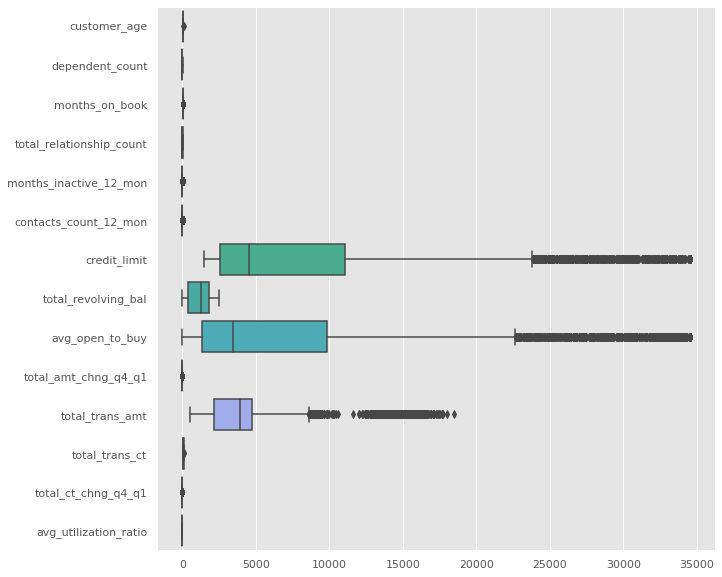

In [ ]:
from mlxtend.preprocessing import standardize
import seaborn as sns
from matplotlib import pyplot as plt
numeric_columns = df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list()
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.show()

_credit_limit_, _avg_open_to_buy_, _total_trans_amt_ have the most outliers in the dataset. We will check closely how much these features affect to _Attrition_Flag_ by below analysis. 

**Percentage on bar chart for Categorical Features**

For the categorical variables, it is best to analyze them at percentage of total on bar charts Below function takes a category column as input and plots bar chart with percentages on top of each bar

In [ ]:
# Below code plots grouped bar for each categorical feature

def perc_on_bar(df: pd.DataFrame, category_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar
    
    Usage:
    ------
    
    perc_on_bar(df, ['age'], 'prodtaken')
    '''
    
    subplot_cols = 2
    subplot_rows = int(len(category_columns)/2 + 1)
    plt.figure(figsize=(16,3*subplot_rows))
    for i, col in enumerate(category_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = df[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=df, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(df[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

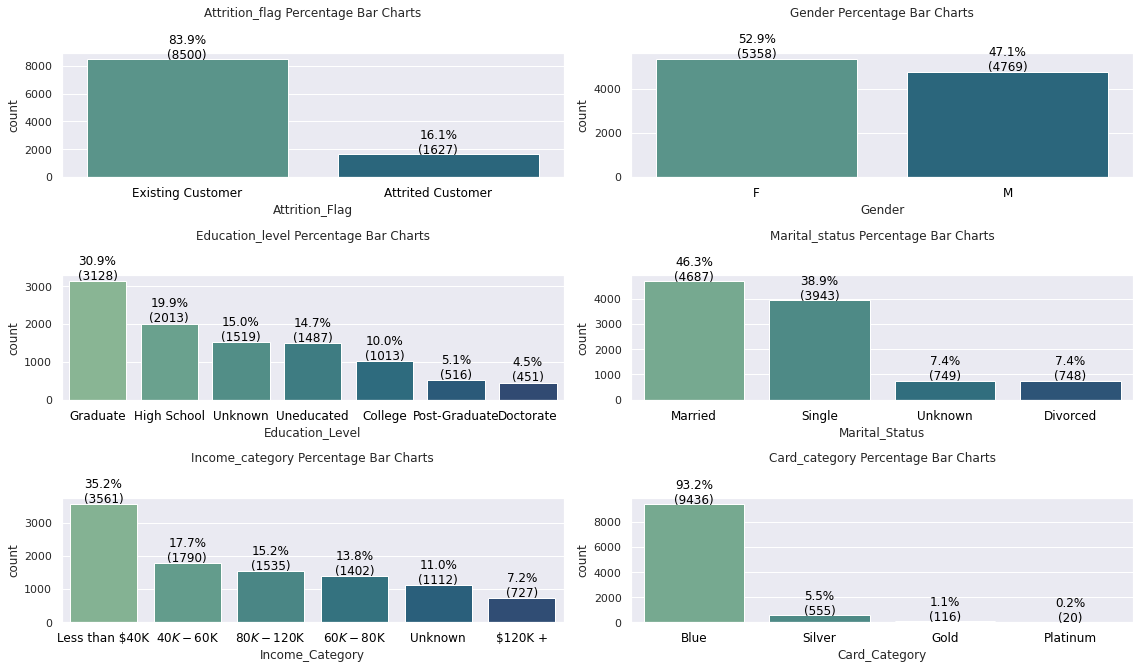

In [ ]:
category_columns = df.select_dtypes(include="object").columns.tolist()

target_variable = "Attrition_Flag"
perc_on_bar(df, category_columns, target_variable)

In [ ]:
import plotly.express as px

 '''
    The function takes a category column as input and plots bar chart with counts 
    
    Usage:
    ------
    
    cat_view_histogram(df, 'cat_col', 'target')
    '''

def cat_view_histogram(df: pd.DataFrame, x, target):
  g = px.histogram(df, x=df[x], color = df[target])
  g.update_layout(width=1050,height=350)
  g.show()

In [ ]:
cat_view_histogram(df, "Education_Level", "Attrition_Flag")
cat_view_histogram(df, "Gender", "Attrition_Flag")
cat_view_histogram(df, "Marital_Status", "Attrition_Flag")
cat_view_histogram(df, "Income_Category", "Attrition_Flag")
cat_view_histogram(df, "Card_Category", "Attrition_Flag")

- High Imbalance in data since the existing vs. attrited customers ratio is 84:16
- Data is almost equally distributed between Males and Females
- 31% customers are Graduate
- ~85% customers are either Single or Married, where 46.7% of the customers are Married
- 35% customers earn less than $40k and 36% earns $60k or more
- ~93% customers have Blue card

**Bi-variate Analysis**

Goal of Bi-variate analysis is to find inter-dependencies between features.

**Target vs. All numerical columns**

In [ ]:
# Below code plots box charts for each numerical feature by each type of Personal Loan (0: Not Borrowed, 1: Borroed)
def box_by_target(data: pd.DataFrame, numeric_columns, target, include_outliers):
    """
    The function takes a category column, target column, and whether to include outliers or not as input
    and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(['age'], 'prodtaken', True)
    """
    subplot_cols = 2
    subplot_rows = int(len(numeric_columns) / 2 + 1)
    plt.figure(figsize=(16, 3 * subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(8, 2, i + 1)
        sns.boxplot(
            data=data,
            x=target,
            y=col,
            orient="vertical",
            palette="Blues",
            showfliers=include_outliers,
        )
        plt.tight_layout()
        plt.title(str(i + 1) + ": " + target + " vs. " + col, color="black")

**With outliers**

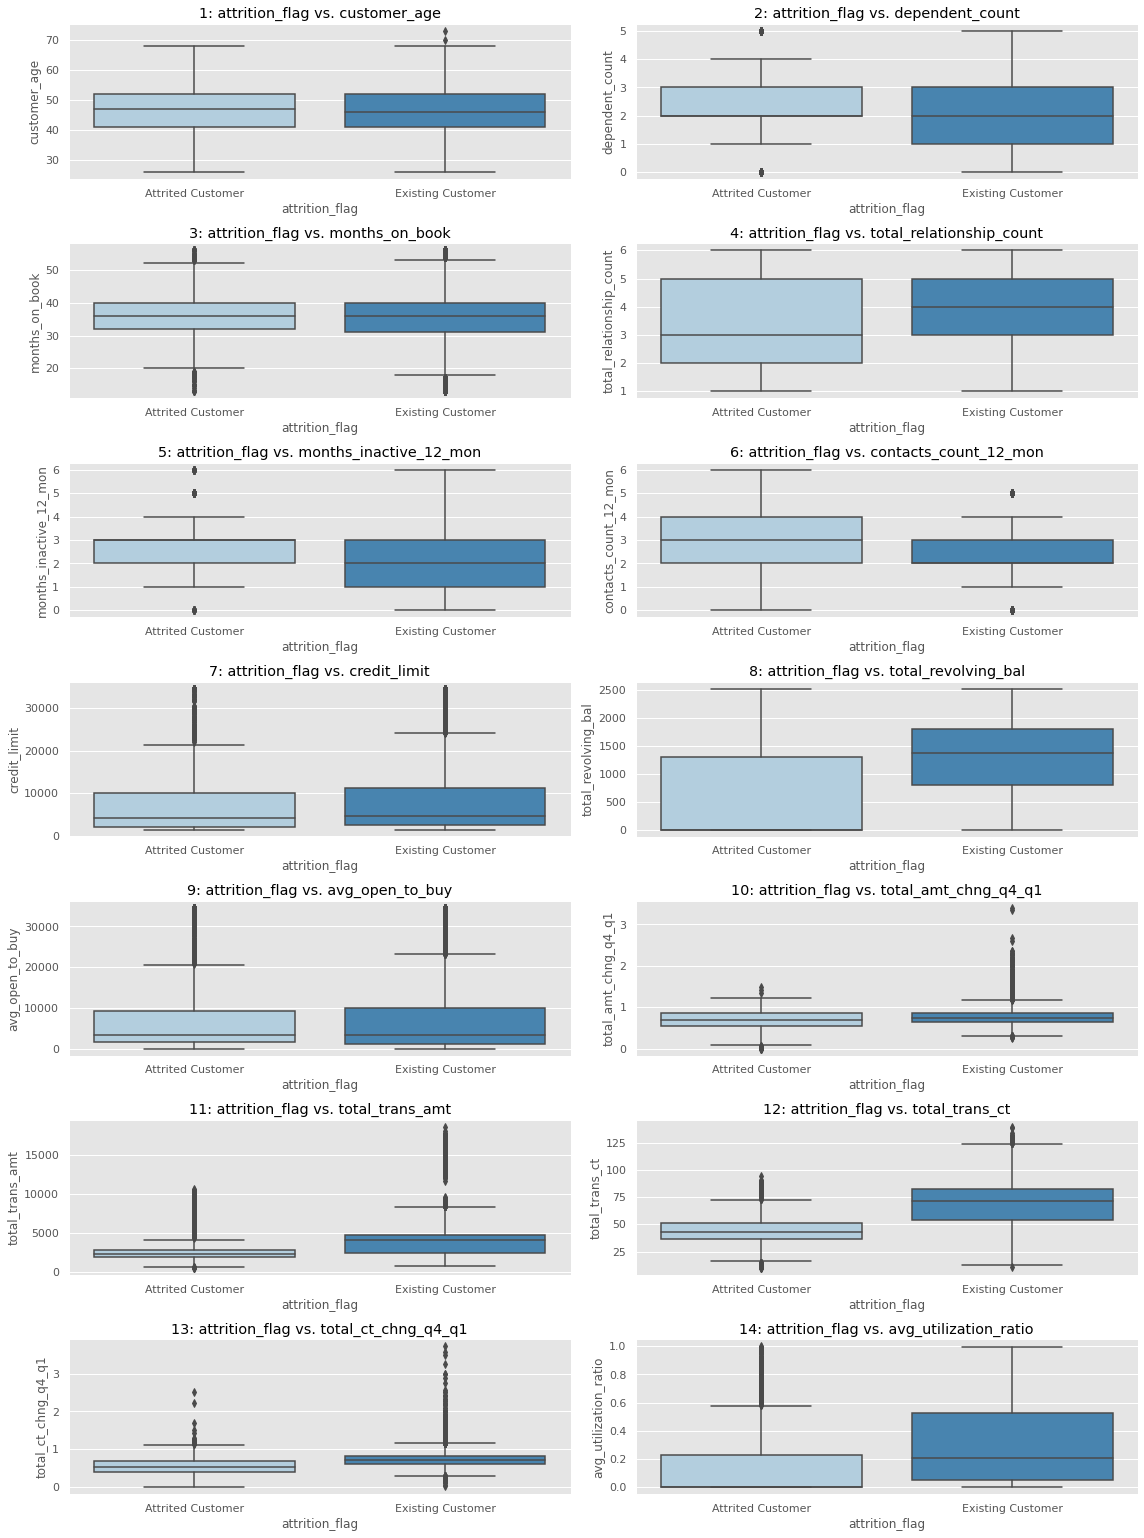

In [ ]:
# numeric_columns = df.select_dtypes(exclude="category").columns.tolist()
numeric_columns= df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list()
target_variable = "attrition_flag"
box_by_target(df, numeric_columns, target_variable, True)

**Without outliers**

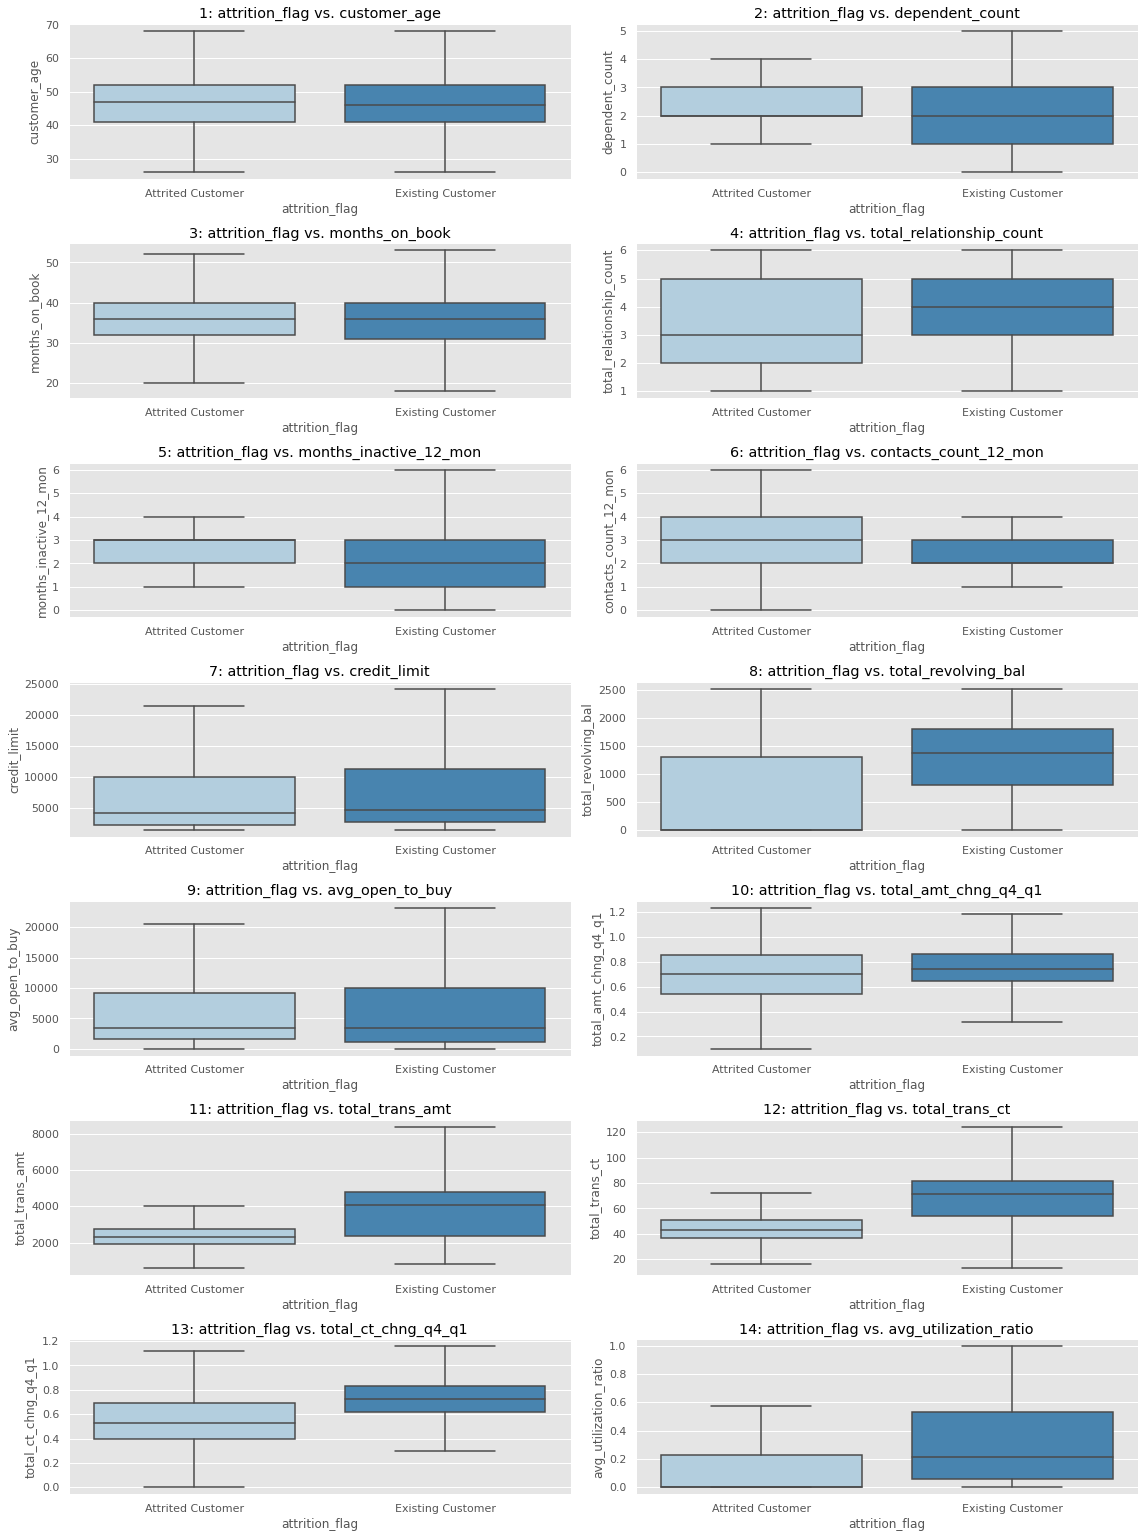

In [ ]:
box_by_target(df, numeric_columns, target_variable, False)

Therefore, Attrited customers have:  

- Lower total transaction amount
- Lower total transaction count
- Lower utilization ratio
- Lower transaction count change Q4 to Q1
- Higher number of times contacted with or by the bank 

**Target _Attrition_Flag_  vs. All Categorical Columns**

In [ ]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(df: pd.DataFrame, x, target):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm

    color1 = cm.inferno(np.linspace(0.4, 0.8, 30))
    color2 = cm.viridis(np.linspace(0.4, 0.8, 30))
    sns.set_palette("cubehelix")
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    """
    Draw a Pie Chart on first subplot.
    """
    s = df.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct / 100.0 * np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax[0].pie(
        mydata_values,
        autopct=lambda pct: func(pct, mydata_values),
        textprops=dict(color="w"),
    )

    ax[0].legend(
        wedges,
        mydata_index,
        title=x.capitalize(),
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.setp(autotexts, size=12)

    ax[0].set_title(f"{x.capitalize()} Pie Chart")

    """
    Draw a Bar Graph on second subplot.
    """

    df = pd.pivot_table(
        df, index=[x], columns=[target], values=["credit_limit"], aggfunc=len
    )

    labels = df.index.tolist()
    no = df.values[:, 1].tolist()
    yes = df.values[:, 0].tolist()

    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(
        l - width / 2, no, width, label="Existing Customer", color=color1
    )
    rects2 = ax[1].bar(
        l + width / 2, yes, width, label="Attrited Customer", color=color2
    )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel("Scores")
    ax[1].set_title(f"{x.capitalize()} Bar Graph")
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        """Attach a text label above each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate(
                "{}".format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                fontsize="medium",
                ha="center",
                va="bottom",
            )

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

    """
    Draw a Stacked Bar Graph on bottom.
    """

    # sns.set(palette="tab10")
    # tab = pd.crosstab(df[x], df[target], normalize="index")

    # tab.plot.bar(stacked=True, figsize=(16, 3))
    # plt.title(x.capitalize() + " Stacked Bar Plot")
    # plt.legend(loc="upper right", bbox_to_anchor=(0, 1))
    # plt.show()

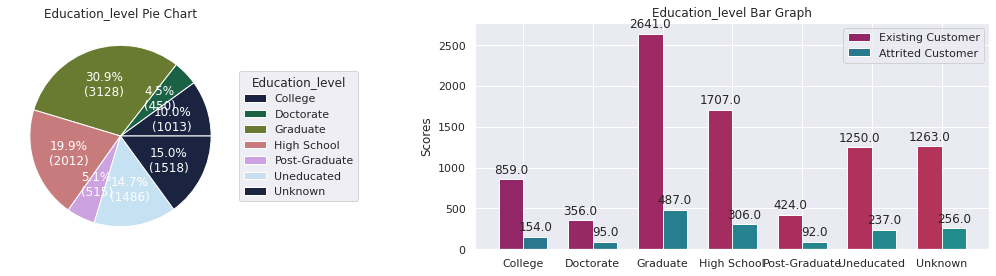

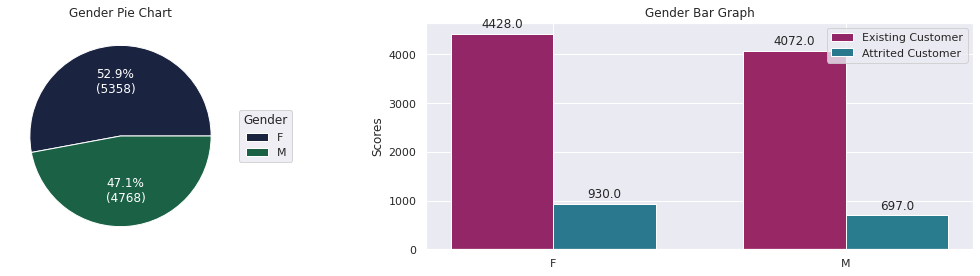

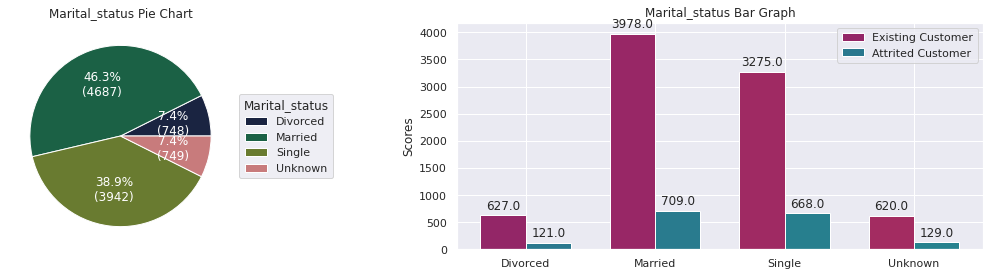

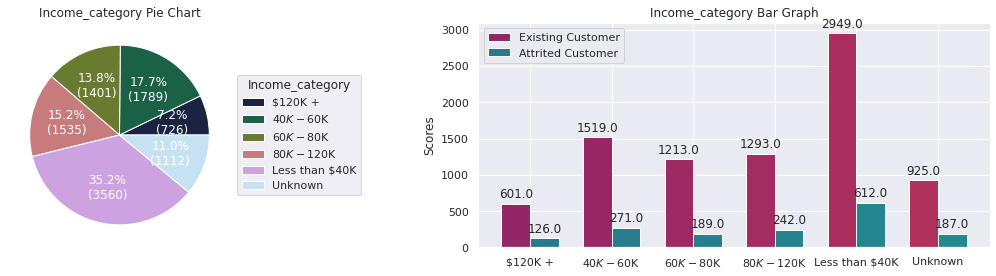

In [ ]:
cat_view(df, "education_level", "attrition_flag")
cat_view(df, "gender", "attrition_flag")
cat_view(df, "marital_status", "attrition_flag")
cat_view(df, "income_category", "attrition_flag")


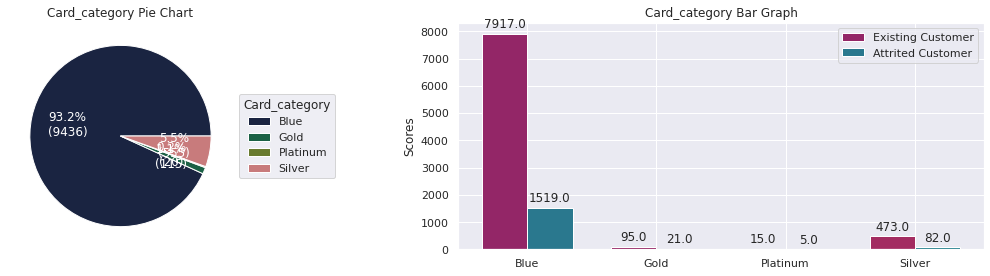

In [ ]:
cat_view(df, "card_category", "attrition_flag")

Attrition does not seem to be related with Education, Gender, Marital Stt,  Income Category. It just shows populated users in the dataset.

Platinum card holder are appearing to be having attrition tendency, however, since there are only 20 data points for platinum card holders, this observation would be biased

<Figure size 1440x1440 with 0 Axes>

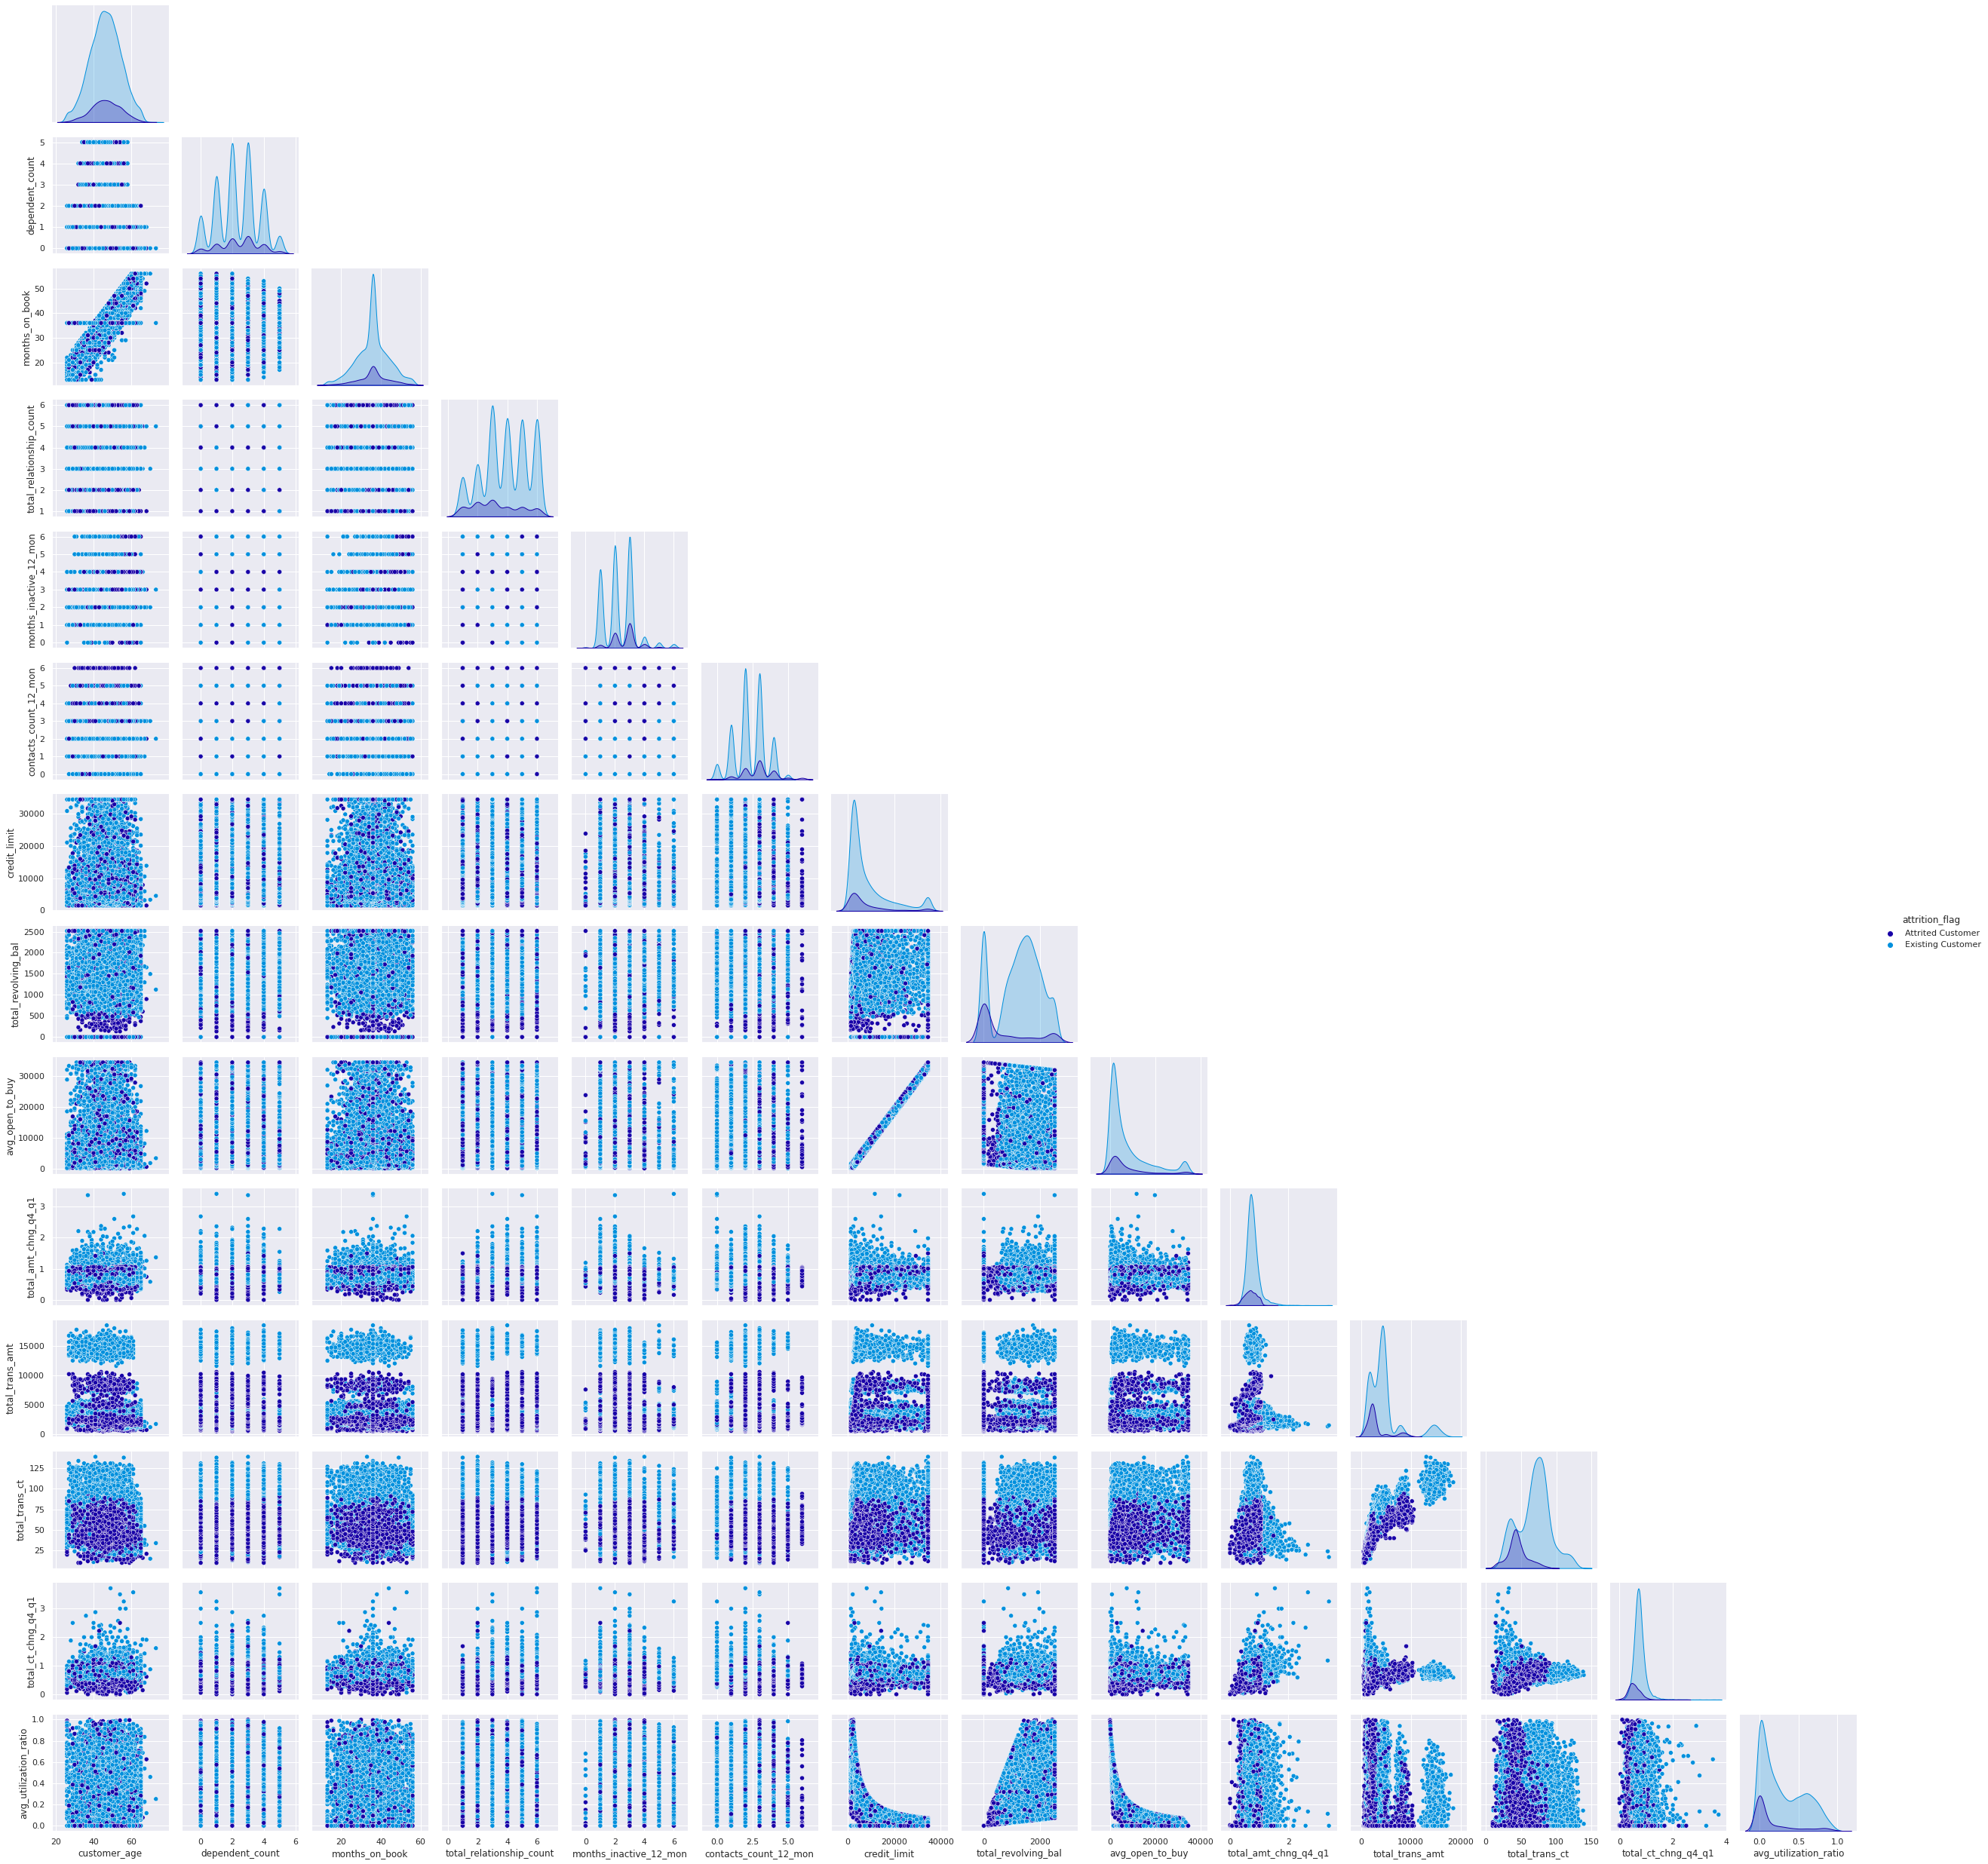

In [ ]:
# Below plot shows correlations between the numerical features in the dataset

plt.figure(figsize=(20, 20))
sns.set(palette="nipy_spectral")
sns.pairplot(data=df, hue="attrition_flag", corner=True)

- There are clusters formed with respect to attrition for the variables total revolving amount, total amount change Q4 to Q1, total transaction amount, total transaction count, total transaction count change Q4 to Q1
- There are strong correlation between a few columns as well, which we'll check in below correlation heatmap.

**Heatmap to understand correlations between independent and dependent variables**

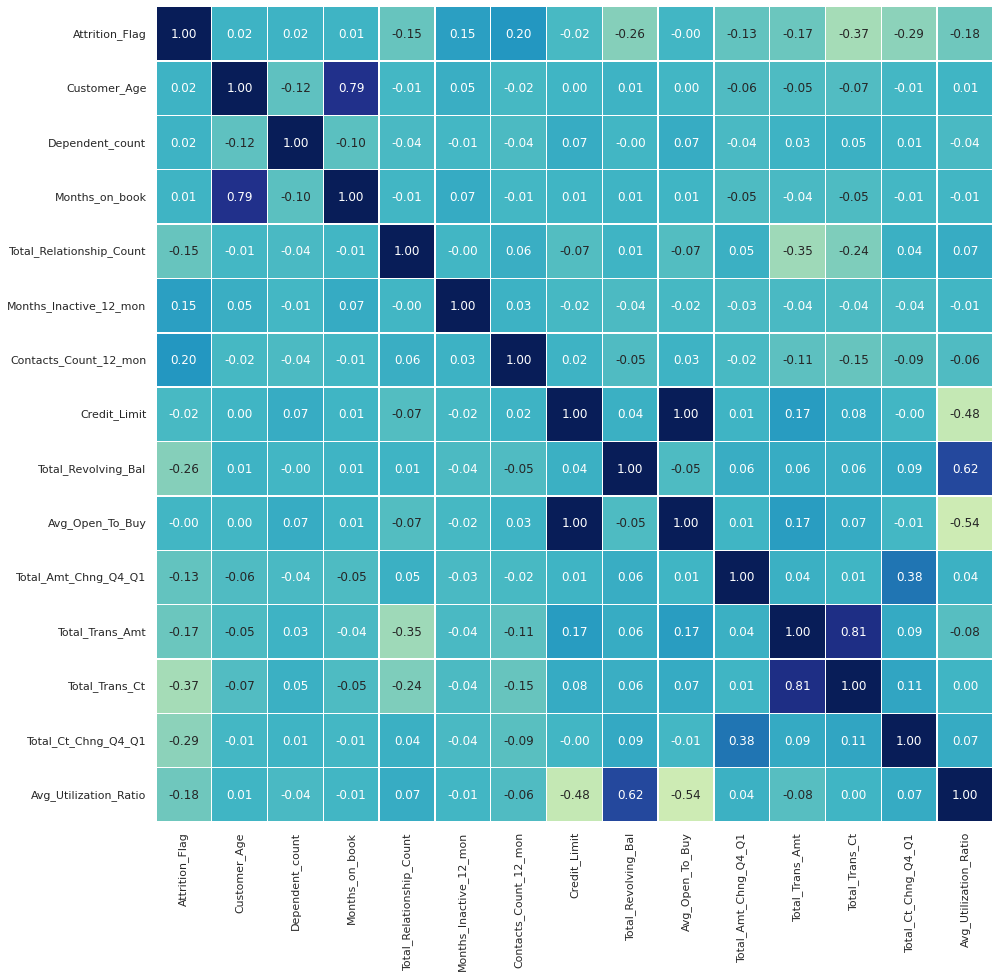

In [ ]:
# Plotting correlation heatmap of the features
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean = df.copy()
data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map(codes).astype(int)


sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data_clean.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()


- Credit Limit and Average Open to Buy have 100% collinearity
- Months on book and Customer Age have quite strong correlation
-Average Utilization Ration and Total Revolving Balance are also a bit correlated it appears
- Attrition Flag does not have highly strong correlation with any of the numeric variables
- Customer Churn appears to be uncorrelated with Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit, we'll remove these from dataset

# Data Preprocessing

Pre-processing steps:

- Data Split into Dependent and Target sets
- Data Split to Train, Test and Validation sets
Standardize feature names
- Drop unnecessary columns (Client Number, Customer Age, - Dependent Count, Months on Book, Open to Buy, Credit Limit)
- Missing Value/Incorrect Value treatment
- Encoding
- Scaling/Outlier treatment

# Building data transformer functions and classes

Firstly we'll work on building models individually after data pre-processing, and later we'll build an ML pipeline to run end to end process of pre-processing and model building. We are creating a data copy for the first part.

In [ ]:
# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

**Creating data copy**

In [ ]:
data = df.copy()
data.describe(include="all")

Attrition_Flag  Customer_Age Gender  Dependent_count  \
count               10127     10127.000  10127        10127.000   
unique                  2           nan      2              nan   
top     Existing Customer           nan      F              nan   
freq                 8500           nan   5358              nan   
mean                  NaN        46.326    NaN            2.346   
std                   NaN         8.017    NaN            1.299   
min                   NaN        26.000    NaN            0.000   
25%                   NaN        41.000    NaN            1.000   
50%                   NaN        46.000    NaN            2.000   
75%                   NaN        52.000    NaN            3.000   
max                   NaN        73.000    NaN            5.000   

       Education_Level Marital_Status Income_Category Card_Category  \
count            10127          10127           10127         10127   
unique               7              4               6             4   
top           Graduate        Married  Less than $40K          Blue   
freq              3128           4687            3561          9436   
mean               NaN            NaN             NaN           NaN   
std                NaN            NaN             NaN           NaN   
min                NaN            NaN             NaN           NaN   
25%                NaN            NaN             NaN           NaN   
50%                NaN            NaN             NaN           NaN   
75%                NaN            NaN             NaN           NaN   
max                NaN            NaN             NaN           NaN   

        Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count        10127.000                 10127.000               10127.000   
unique             nan                       nan                     nan   
top                nan                       nan                     nan   
freq               nan                       nan                     nan   
mean            35.928                     3.813                   2.341   
std              7.986                     1.554                   1.011   
min             13.000                     1.000                   0.000   
25%             31.000                     3.000                   2.000   
50%             36.000                     4.000                   2.000   
75%             40.000                     5.000                   3.000   
max             56.000                     6.000                   6.000   

        Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.000     10127.000            10127.000   
unique                    nan           nan                  nan   
top                       nan           nan                  nan   
freq                      nan           nan                  nan   
mean                    2.455      8631.954             1162.814   
std                     1.106      9088.777              814.987   
min                     0.000      1438.300                0.000   
25%                     2.000      2555.000              359.000   
50%                     2.000      4549.000             1276.000   
75%                     3.000     11067.500             1784.000   
max                     6.000     34516.000             2517.000   

        Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
count         10127.000             10127.000        10127.000   
unique              nan                   nan              nan   
top                 nan                   nan              nan   
freq                nan                   nan              nan   
mean           7469.140                 0.760         4404.086   
std            9090.685                 0.219         3397.129   
min               3.000                 0.000          510.000   
25%            1324.500                 0.631         2155.500   
50%            3474.000      

**Defining the static variables**

In [ ]:
# The static variables

# For dropping columns
columns_to_drop = [
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

**Data Type Conversions**

Here we are converting Object data type to Category

In [ ]:
cat_columns = data.select_dtypes(include="object").columns.tolist()
data[cat_columns] = data[cat_columns].astype("category")

**Dependent and independent variables**

Splitting the dataset into dependent and independent variable sets

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [ ]:
# lower keys for data dataset
data.columns = [i.replace(" ", "_").lower() for i in data.columns]
X = data.drop(columns=["attrition_flag"])
y = data["attrition_flag"].map(target_mapper)

# Split data in Train, Validation and Test sets

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 19) 

Validation Data Shape: 

 (2026, 19) 

Testing Data Shape: 

 (2026, 19)


**Checking the ratio of labels in the target column for each of the data segments**

In [ ]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 0   0.839
1   0.161
Name: attrition_flag, dtype: float64


Validation: 
 0   0.839
1   0.161
Name: attrition_flag, dtype: float64


Test: 
 0   0.840
1   0.160
Name: attrition_flag, dtype: float64


# Data processing

Data pre-processing is one of the the most important parts of the job before starting to train the model with the dataset. We need to impute missing values, fix any illogical data value in columns, convert category columns to numeric (either ordinal, or binary using one-hot encoding), scale the data to deal with the distribution skewness and outliers, before feeding the data to a model.  

We are using the pre-available transformation classes and the custom classes that we created to first fit the training data and then transform the train, validation and test dataset. This is the standard logical practice to keep the influence of test and validation data in the train dataset to prevent/avoid data leakage while training or validating the model.

Some Methods we use: 
- FeatureNamesStandardizer 
- ColumDropper
-CustomValuemasker
- FillUnknown
- Encode the data : PandasOneHot (similar to LabelEncoder)
- Scale the num_cols : RobustScaler (similar to MinMaxScaler)
 

In [ ]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

X_train = column_dropper.fit_transform(X_train)
X_val = column_dropper.transform(X_val)
X_test = column_dropper.transform(X_test)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

X_train = value_masker.fit_transform(X_train)
X_val = value_masker.transform(X_val)
X_test = value_masker.transform(X_test)

# To impute categorical Nulls to Unknown
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

# To encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


# Scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

X_train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_columns]),
    columns=num_columns,
    index=X_train.index,
)
X_val[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
)
X_test[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_test[num_columns]),
    columns=num_columns,
    index=X_test.index,
)

In [ ]:
X_train.head(3)

total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
800                      3.000                   4.000                  3.000   
498                      3.000                   2.000                  0.000   
4356                     2.500                   1.000                  2.000   

      total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  \
800                 1.226                 2.044            0.648   
498                 1.450                 1.697            0.524   
4356                1.926                 3.829            1.661   

      total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  gender_M  \
800            1.278                2.249                  0.168         1   
498            0.861                2.667                  1.376         1   
4356           2.194                3.717                  0.775         1   

      education_level_Doctorate  education_level_Graduate  \
800                           0                         0   
498                           0                         0   
4356                          0                         0   

      education_level_High School  education_level_Post-Graduate  \
800                             0                              0   
498                             0                              0   
4356                            1                              0   

      education_level_Uneducated  education_level_Unknown  \
800                            0                        1   
498                            0                        1   
4356                           0                        0   

      marital_status_Married  marital_status_Single  marital_status_Unknown  \
800                        0                      1                       0   
498                        1                      0                       0   
4356                       1                      0                       0   

      income_category_$40K - $60K  income_category_$60K - $80K  \
800                             0                            0   
498                             0                            0   
4356                            0                            0   

      income_category_$80K - $120K  income_category_Less than $40K  \
800                              0                               0   
498                              0                               0   
4356                             1                               0   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
800                         0                   0                       0   
498                         1                   0                       0   
4356                        0                   0                       0   

      card_category_Silver  
800                      0  
498                      0  
4356                     0

In [ ]:
X_val.head(3)

total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
2894                     2.500                   2.000                  3.000   
9158                     0.500                   3.000                  1.000   
9618                     1.500                   4.000                  3.000   

      total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  \
2894                0.000                 5.083            1.148   
9158                0.000                 3.982            3.148   
9618                1.584                 3.860            5.291   

      total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  gender_M  \
2894           1.528                4.068                  0.000         1   
9158           1.639                3.810                  0.000         1   
9618           2.833                2.300                  0.126         1   

      education_level_Doctorate  education_level_Graduate  \
2894                          0                         0   
9158                          0                         0   
9618                          0                         0   

      education_level_High School  education_level_Post-Graduate  \
2894                            0                              1   
9158                            0                              0   
9618                            0                              0   

      education_level_Uneducated  education_level_Unknown  \
2894                           0                        0   
9158                           1                        0   
9618                           1                        0   

      marital_status_Married  marital_status_Single  marital_status_Unknown  \
2894                       0                      1                       0   
9158                       0                      1                       0   
9618                       1                      0                       0   

      income_category_$40K - $60K  income_category_$60K - $80K  \
2894                            0                            0   
9158                            0                            0   
9618                            0                            0   

      income_category_$80K - $120K  income_category_Less than $40K  \
2894                             1                               0   
9158                             1                               0   
9618                             0                               0   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
2894                        0                   0                       0   
9158                        0                   0                       0   
9618                        0                   0                       1   

      card_category_Silver  
2894                     0  
9158                     0  
9618                     0

In [ ]:
X_test.head()

total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
9760                     1.000                   3.000                  2.000   
7413                     2.000                   3.000                  2.000   
6074                     1.500                   3.000                  3.000   
3520                     2.000                   3.000                  4.000   
6103                     2.500                   3.000                  4.000   

      total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  \
9760                0.865                 3.316            5.556   
7413                0.000                 3.219            0.850   
6074                0.000                 3.237            1.658   
3520                1.926                 1.860            0.637   
6103                1.926                 3.250            1.034   

      total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  gender_M  \
9760           2.583                2.544                  0.369         1   
7413           1.139                2.190                  0.000         1   
6074           2.056                3.215                  0.000         0   
3520           0.750                2.110                  0.218         1   
6103           1.556                1.840                  1.223         0   

      education_level_Doctorate  education_level_Graduate  \
9760                          0                         0   
7413                          0                         0   
6074                          0                         0   
3520                          0                         0   
6103                          0                         0   

      education_level_High School  education_level_Post-Graduate  \
9760                            1                              0   
7413                            0                              1   
6074                            1                              0   
3520                            0                              0   
6103                            0                              0   

      education_level_Uneducated  education_level_Unknown  \
9760                           0                        0   
7413                           0                        0   
6074                           0                        0   
3520                           1                        0   
6103                           0                        0   

      marital_status_Married  marital_status_Single  marital_status_Unknown  \
9760                       0                      1                       0   
7413                       0                      1                       0   
6074                       1                      0                       0   
3520                       1                      0                       0   
6103                       1                      0                       0   

      income_category_$40K - $60K  income_category_$60K - $80K  \
9760                            0                            0   
7413                            0                            1   
6074                            1                            0   
3520                            0                            0   
6103                            1                            0   

      income_category_$80K - $120K  income_category_Less than $40K  \
9760                             1                               0   
7413                             0                               0   
6074                             0                               0   
3520                             0                               0   
6103                             0                               0   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
9760                        0                   0                       0   
7413                        0                   0  

In [ ]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 27) 

Validation Data Shape: 

 (2026, 27) 

Testing Data Shape: 

 (2026, 27)


We are now all set to build, train and validate the model

# Model Building Considerations

**Model evaluation criterion:**

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer does not attrite - Loss of resources
- Predicting a customer will not attrite and the customer attrites - Loss of opportunity for churning the customer - _False_Negative_ 

**Which case is more important?**

Predicting that customer will not attrite, but actually attrites, would result in loss for the bank since if predicted correctly, marketing/sales team could have contacted the customer to retain them. This would result in losses. So, the false negatives should be minimized.


**How to reduce this loss i.e need to reduce False Negatives?**

Company wants **Recal**l to be maximized, greater the Recall lesser the chances of false negatives.

Let's start by building different models using **KFold and _cross_val_score_ and tune the best model using RandomizedSearchCV**

Stratified K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.


# Model Evaluation Functions - Scoring & Confusion Matrix


We are creating a few functions to score the models, show the confusion matrix

**Function to Get Scores**


- Function to calculate different metric scores of the model: Accuracy, Recall, Precision, and F1 score
- model: classifier to predict values of X
- train, test: Independent features
- train_y,test_y: Dependent variable
- threshold: thresold for classifiying the observation as 1
- flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
- ROC: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    

In [ ]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=False, roc=True
):
    
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    ## accuracy_score
    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)
    ## recall_score
    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)
    ## precision_score
    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)
    ## f1_score
    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba = model.predict_proba(test)[:, 1]
    ## roc_auc_score
    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc = roc_auc_score(test_y, pred_test_proba)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:

        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print(
                "ROC-AUC Score on training set : ", roc_auc_score(train_y, pred_train_proba),
            )
            print(
                "ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test_proba)
            )

    return score_list  # returning the list with train and test scores

**Function to Draw Confusion Matrix**

- model : classifier to predict values of X
- test_X: test set
- y_actual : ground truth

In [ ]:
def make_confusion_matrix(model, test_X, y_actual, labels=[1, 0]):
    
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - Attrited", "Actual - Existing"]],
        columns=[i for i in ["Predicted - Attrited", "Predicted - Existing"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(7, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")

**Function to Add Scores to Scoring Lists**

In [ ]:
# # defining empty lists to add train and test results

model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    """Add scores to list so that we can compare all models score together"""
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)

# Building Models


We are building 7 models here: 
- Bagging
- Random Forest 
- Gradient Boosting
- Ada Boosting
-  Extreme Gradient Boosting
-  Decision Tree Classification (Classification and Regression Trees - CART)
-  Light Gradient Boosting.


Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.
 

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Before is a diagrammatic representation by the makers of the Light GBM to explain the difference clearly. 
(Source: TowardsDataScience)

P/s: You can also use OPTUNA to turning hypaparameters to find best params of the model classifier you are using. In this Notebook I use SMOTE  to oversampling train data, as our dataset is imbalanced. 
 References: https://www.kaggle.com/corochann/optuna-tutorial-for-hyperparameter-optimization#1.-Define-%22objective%22-function


In [ ]:
models = []  # Empty list to store all the models
cv_results = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=seed)))
models.append(("Random forest", RandomForestClassifier(random_state=seed)))
models.append(("GBM", GradientBoostingClassifier(random_state=seed)))
models.append(("Adaboost", AdaBoostClassifier(random_state=seed)))
models.append(("Xgboost", XGBClassifier(random_state=seed, eval_metric=loss_func)))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=seed)))
models.append(("Light GBM", lgb.LGBMClassifier(random_state=seed)))

# For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result)

    model.fit(X_train, y_train)
    model_score = get_metrics_score(model, X_train, X_val, y_train, y_val)
    add_score_model(name, model_score, cv_result.mean())

print("Operation Completed!")


Operation Completed!


**Comparing Models**

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0)

The best model with respect to cross validation score and test recall is Light GBM.

The next best models are XGBoost, GBM and AdaBoost respectively

**Plotting the cross-validation result comparison**


We are plotting the cross validation results for the 7 models in a Box plot, to check which models are potentially good.

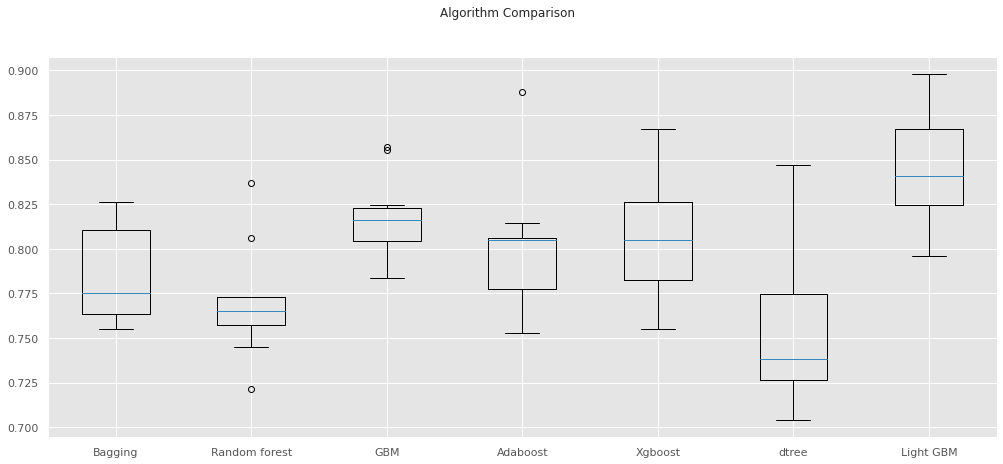

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(17, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(cv_results)
ax.set_xticklabels(model_names)

plt.show()

It appears Light GBM, XGBoost, GBM are the models with good potential. Ada Boost also looks good with the higher end outlier performance score

# Oversampling train data using SMOTE


Our dataset has a huge imbalance in target variable labels. To deal with such datasets, we have a few tricks up our sleeves, which we call **Imbalanced Classification**.

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on the minority class, although typically it is performance on the minority class that is most important, which is the case in our study here.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [ ]:
sm = SMOTE(
    sampling_strategy="minority", k_neighbors=10, random_state=seed
)  # Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 27)
After UpSampling, the shape of train_y: (10198,) 



**Build Models with Oversampled Data**

We are building and training the same 7 models as before. We are however going to use the over-sampled training data for training the models.

In [ ]:
models_over = []

# Appending models into the list

models_over.append(("Bagging UpSampling", BaggingClassifier(random_state=seed)))
models_over.append(
    ("Random forest UpSampling", RandomForestClassifier(random_state=seed))
)
models_over.append(("GBM UpSampling", GradientBoostingClassifier(random_state=seed)))
models_over.append(("Adaboost UpSampling", AdaBoostClassifier(random_state=seed)))
models_over.append(
    ("Xgboost UpSampling", XGBClassifier(random_state=seed, eval_metric=loss_func))
)
models_over.append(("dtree UpSampling", DecisionTreeClassifier(random_state=seed)))
models_over.append(("Light GBM UpSampling", lgb.LGBMClassifier(random_state=seed)))

for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result_over)

    model.fit(X_train_over, y_train_over)
    model_score_over = get_metrics_score(
        model, X_train_over, X_val, y_train_over, y_val
    )
    add_score_model(name, model_score_over, cv_result_over.mean())

print("Operation Completed!")

Operation Completed!


**Comparing Models**

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0)

The best 4 models with respect to validation recall and cross validation score, are as follows:
- Light GBM trained with over/up-sampled data
- GBM trained with over/up-sampled data
- AdaBoost trained with over/up-sampled data
- XGBoost trained with over/up-sampled data

# Undersampling train data using Random Under Sample


Undersampling is another way of dealing with imbalance in the dataset.

Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset until a balanced dataset is created.

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))


Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 27)
After Under Sampling, the shape of train_y: (1952,) 



**Build Models with Undersampled Data**


We are again building the same 7 models as before and training with the undersampled dataset, and use the validation dataset to score the models.

In [ ]:
models_under = []

# Appending models into the list

models_under.append(("Bagging DownSampling", BaggingClassifier(random_state=seed)))
models_under.append(
    ("Random forest DownSampling", RandomForestClassifier(random_state=seed))
)
models_under.append(("GBM DownSampling", GradientBoostingClassifier(random_state=seed)))
models_under.append(("Adaboost DownSampling", AdaBoostClassifier(random_state=seed)))
models_under.append(
    ("Xgboost DownSampling", XGBClassifier(random_state=seed, eval_metric=loss_func))
)
models_under.append(("dtree DownSampling", DecisionTreeClassifier(random_state=seed)))
models_under.append(("Light GBM DownSampling", lgb.LGBMClassifier(random_state=seed)))

for name, model in models_under:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result_under = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result_under)

    model.fit(X_train_un, y_train_un)
    model_score_under = get_metrics_score(model, X_train_un, X_val, y_train_un, y_val)
    add_score_model(name, model_score_under, cv_result_under.mean())

print("Operation Completed!")

Operation Completed!


**Comparing Models**

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
).style.highlight_max(color="blue", axis=0).highlight_min(color="violet", axis=0)

The 4 best models are:
- XGBoost trained with undersampled data
- AdaBoost trained with undersampled data
- Light GBM trained with undersampled data
- GBM trained with undersampled data  
We will now try to tune these 4 models using Random Search CV

**Choice of models for tuning**

1. XGBoost with down-sampling has the best validation recall of 96.3%, along-with 95% cross validation score on train, and 0.99 AUC, which means is it has high possibility of performing very well in unseen dataset. There is a bit of over-fitting, which I expect to resolve by tuning.  
2. AdaBoost is generalizing the model very well, it is neither over-fitting, nor has any bias, AUC is 0.985 and cross validation score on train is 93%, recall on validation set is same as XGBoost (96.3%). I expect to improve the model (~94% on validation set) via tuning.  
3. Light GBM works really well in all aspects, but there is slight over-fitting problem, which I expect to resolve by tuning. Accuracy on validation is 94%, with cross validation score on train 95%, recall on validation ~96%, AUC is 0.99. This looks like a very promising model.  
4. GBM is not overfitting, and neither it is suffering from bias or variance. Recall on validation is ~96%, accuracy on validation ~94%, AUC is ~0.99, cross validation score on train is ~95%. This would be my top choice because none of the training scores are 100%, meaning it is not trying to explain every single aspect of training data by overfitting it.

#** Model Tuning using RandomizedSearchCV**

# Tuning XGBOOST with Down Sampled data

Finding best parameter for high recall using Random Search with cross validation

In [ ]:


# defining model
model = XGBClassifier(random_state=seed, eval_metric=loss_func)


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,500,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(4,20,1),
            'reg_lambda':[5,10, 15, 20]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 20, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0} with CV score=0.990753208499895:


**Building the model with the resulted best parameters**

In [ ]:
# building model with best parameters
xgb_tuned_model = XGBClassifier(
    n_estimators=150,
    scale_pos_weight=10,
    subsample=1,
    reg_lambda=20,
    max_depth=5,
    learning_rate=0.01,
    gamma=0,
    eval_metric=loss_func,
    random_state=seed,
)
# Fit the model on training data
xgb_tuned_model.fit(X_train_un, y_train_un)

XGBClassifier(eval_metric='logloss', learning_rate=0.01, max_depth=5,
              n_estimators=150, random_state=1, reg_lambda=20,
              scale_pos_weight=10)

**Get scores**

In [ ]:
xgb_tuned_model_score = get_metrics_score(
    xgb_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
xgb_down_cv = cross_val_score(
    estimator=xgb_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "XGB Tuned with Down Sampling", xgb_tuned_model_score, xgb_down_cv.mean()
)

**Confusion matrix on validation**

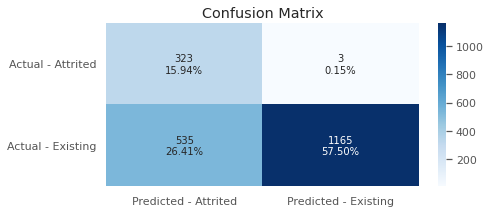

In [ ]:
make_confusion_matrix(xgb_tuned_model, X_val, y_val)

# Tuning AdaBoost with Down Sampled data

Finding best parameter for high recall using Random Search with cross validation

In [ ]:
# defining model
model = AdaBoostClassifier(random_state=seed)



# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,2000,50),
            'learning_rate':[0.01,0.1,0.2,0.05]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
ada_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(ada_tuned.best_params_,ada_tuned.best_score_))

Best parameters are {'n_estimators': 1050, 'learning_rate': 0.1} with CV score=0.9405743740795287:


**Building the model with the resulted best parameters**

In [ ]:
# building model with best parameters
ada_tuned_model = AdaBoostClassifier(
    n_estimators=1050, learning_rate=0.1, random_state=seed
)
# Fit the model on training data
ada_tuned_model.fit(X_train_un, y_train_un)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1050, random_state=1)

**Get scores**

In [ ]:
ada_tuned_model_score = get_metrics_score(
    ada_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
ada_down_cv = cross_val_score(
    estimator=ada_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "AdaBoost Tuned with Down Sampling", ada_tuned_model_score, ada_down_cv.mean()
)

**Confusion matrix on validation**

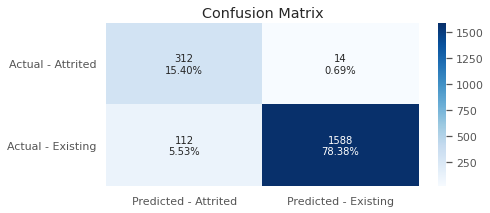

In [ ]:
make_confusion_matrix(ada_tuned_model, X_val, y_val)

# Tuning Light GBM with Down-Sampled data


Finding best parameter for high recall using Random Search with cross validation

In [ ]:
# defining model
model = lgb.LGBMClassifier(random_state=seed)

# Hyper parameters
min_gain_to_split = [0.01, 0.1, 0.2, 0.3]
min_data_in_leaf = [10, 20, 30, 40, 50]
feature_fraction = [0.8, 0.9, 1.0]
max_depth = [5, 8, 15, 25, 30]
extra_trees = [True, False]
learning_rate = [0.01,0.1,0.2,0.05]

# Parameter grid to pass in RandomizedSearchCV
param_grid={'min_gain_to_split': min_gain_to_split,
               'min_data_in_leaf': min_data_in_leaf,
               'feature_fraction': feature_fraction,
               'max_depth': max_depth,
               'extra_trees': extra_trees,
               'learning_rate': learning_rate,
               'boosting_type': ['gbdt'],
               'objective': ['binary'],
               'is_unbalance': [True],
               'metric': ['binary_logloss'],} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
lgbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
lgbm_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(lgbm_tuned.best_params_,lgbm_tuned.best_score_))

Best parameters are {'objective': 'binary', 'min_gain_to_split': 0.1, 'min_data_in_leaf': 30, 'metric': 'binary_logloss', 'max_depth': 8, 'learning_rate': 0.1, 'is_unbalance': True, 'feature_fraction': 0.9, 'extra_trees': False, 'boosting_type': 'gbdt'} with CV score=0.9549126867241743:


**Building the model with the resulted best parameters**

In [ ]:
# building model with best parameters
lgbm_tuned_model = lgb.LGBMClassifier(
               min_gain_to_split = 0.01,
               min_data_in_leaf = 50,
               feature_fraction = 0.8,
               max_depth = 8,
               extra_trees = False,
               learning_rate = 0.2,
               objective = 'binary',
               metric = 'binary_logloss',
               is_unbalance = True,
               boosting_type = 'gbdt',
               random_state = seed
)
# Fit the model on training data
lgbm_tuned_model.fit(X_train_un, y_train_un)

LGBMClassifier(extra_trees=False, feature_fraction=0.8, is_unbalance=True,
               learning_rate=0.2, max_depth=8, metric='binary_logloss',
               min_data_in_leaf=50, min_gain_to_split=0.01, objective='binary',
               random_state=1)

**Get scores**

In [ ]:
lgbm_tuned_model_score = get_metrics_score(
    lgbm_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
lgb_down_cv = cross_val_score(
    estimator=lgbm_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "Light GBM Tuned with Down Sampling", lgbm_tuned_model_score, lgb_down_cv.mean()
)

**Confusion matrix on validation**

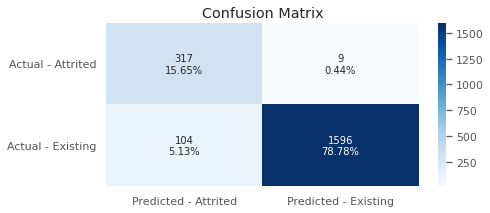

In [ ]:
make_confusion_matrix(lgbm_tuned_model, X_val, y_val)

# Tuning GBM with Down Sampled data

Finding best parameter for high recall using Random Search with cross validation

In [ ]:
# defining model
model = GradientBoostingClassifier(random_state=seed)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15] 


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gbm_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(gbm_tuned.best_params_,gbm_tuned.best_score_))

Best parameters are {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 25} with CV score=0.9590258783925941:


**Building the model with the resulted best parameters**



gbm_tuned_model = GradientBoostingClassifier(
    n_estimators=700,
    max_features="auto",
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=15,
    random_state=seed,
)

In [ ]:
# building model with best parameters
gbm_tuned_model = GradientBoostingClassifier(
    n_estimators=700,
    max_features="auto",
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=15,
    random_state=seed,
)
# Fit the model on training data
gbm_tuned_model.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_depth=25, max_features='auto',
                           min_samples_leaf=15, n_estimators=700,
                           random_state=1)

**Get scores**

In [ ]:
gbm_tuned_model_score = get_metrics_score(
    gbm_tuned_model, X_train, X_val, y_train, y_val
)


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
gbm_down_cv = cross_val_score(
    estimator=gbm_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "GBM Tuned with Down Sampling", gbm_tuned_model_score, gbm_down_cv.mean()
)

**Confusion matrix on validation**

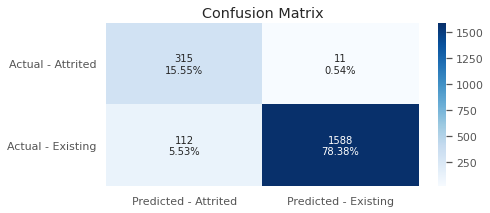

In [ ]:
make_confusion_matrix(gbm_tuned_model, X_val, y_val)

# Comparing Models

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)


for col in comparison_frame.select_dtypes(include="float64").columns.tolist():
    comparison_frame[col] = round(comparison_frame[col] * 100, 0).astype(int)


comparison_frame.tail(4).sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
)

Model  Cross_Val_Score_Train  Train_Accuracy  \
35        XGB Tuned with Down Sampling                     99              73   
37  Light GBM Tuned with Down Sampling                     95              96   
38        GBM Tuned with Down Sampling                     95              95   
36   AdaBoost Tuned with Down Sampling                     94              94   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
35             73           100           99               37              38   
37             94           100           97               78              75   
38             94           100           97               77              74   
36             94            96           96               73              74   

    Train_F1  Test_F1  Train_ROC_AUC  Test_ROC_AUC  
35        54       55             97            96  
37        88       85            100            99  
38        87       84            100            99  
36        83       83             99            99

**Final Model Selection**

- The XGBoost model with hyper parameter tuning and trained with undersampled dataset, has best recall on validation set of ~99%, but accuracy is lower than the human level accuracy (i,e, classifying everyone as non-attriting customers). Thus, we are not selecting this model as the final model
 
- The validation recall of ~97% is provided by the GBM with hyper parameter tuning trained with undersampled dataset, has validation accuracy of ~94%, and precision of ~74%, Validation AUC ~99%, Cross Validation Mean of 96%. Also, the model is neither suffering from bias, nor variance. We are selecting **GBM Tuned with Down Sampling model as our final model**

# Check Test Data on GBM Tuned and Trained with Downsampled Data


**Feature Importance**

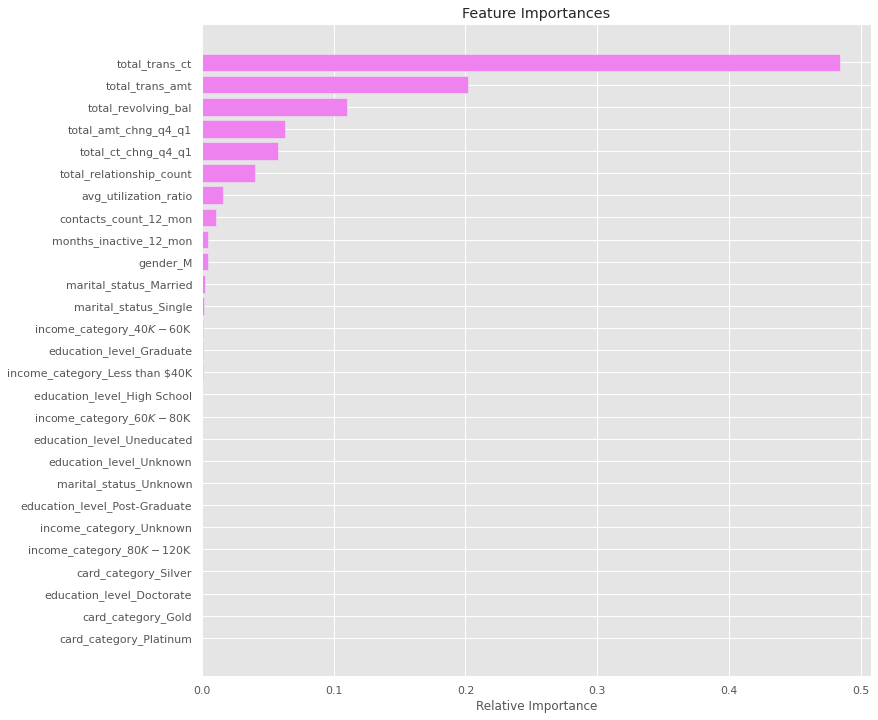

In [ ]:
feature_names = X_train.columns
importances = gbm_tuned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Let's check the performance of the model on Test dataset.

**Test scores**

In [ ]:
gbm_tuned_model_test_score = get_metrics_score(
    gbm_tuned_model, X_train, X_test, y_train, y_test
)

final_model_names = ["gbm Tuned Down-sampled Trained"]
final_acc_train = [gbm_tuned_model_test_score[0]]
final_acc_test = [gbm_tuned_model_test_score[1]]
final_recall_train = [gbm_tuned_model_test_score[2]]
final_recall_test = [gbm_tuned_model_test_score[3]]
final_precision_train = [gbm_tuned_model_test_score[4]]
final_precision_test = [gbm_tuned_model_test_score[5]]
final_f1_train = [gbm_tuned_model_test_score[6]]
final_f1_test = [gbm_tuned_model_test_score[7]]
final_roc_auc_train = [gbm_tuned_model_test_score[8]]
final_roc_auc_test = [gbm_tuned_model_test_score[9]]

final_result_score = pd.DataFrame(
    {
        "Model": final_model_names,
        "Train_Accuracy": final_acc_train,
        "Test_Accuracy": final_acc_test,
        "Train_Recall": final_recall_train,
        "Test_Recall": final_recall_test,
        "Train_Precision": final_precision_train,
        "Test_Precision": final_precision_test,
        "Train_F1": final_f1_train,
        "Test_F1": final_f1_test,
        "Train_ROC_AUC": final_roc_auc_train,
        "Test_ROC_AUC": final_roc_auc_test,
    }
)


for col in final_result_score.select_dtypes(include="float64").columns.tolist():
    final_result_score[col] = final_result_score[col] * 100


final_result_score

Model  Train_Accuracy  Test_Accuracy  \
0  gbm Tuned Down-sampled Trained          95.144         93.238   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
0       100.000       96.000           76.790          71.560    86.871   

   Test_F1  Train_ROC_AUC  Test_ROC_AUC  
0   81.997         99.819        99.098

The performance of the model with the test data is almost similar to the performance on the validation dataset.

**Confusion Matrix**

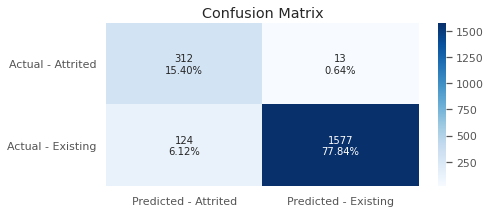

In [ ]:
make_confusion_matrix(gbm_tuned_model, X_test, y_test)

# Checking models in production

**Cumulative Lift/Gain Chart**

Cumulative lift/gain chart is important to understand how a model would perform in production system with unseen data

In [ ]:
pip install scikit-plot

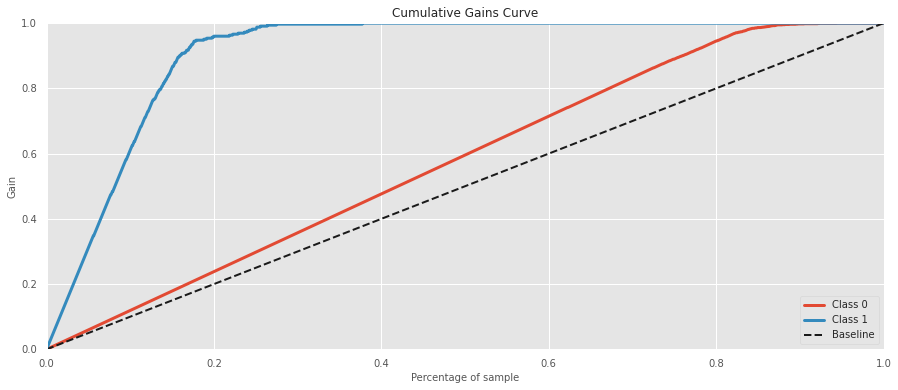

In [ ]:
import scikitplot as skplt

y_pred_prob = gbm_tuned_model.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, y_pred_prob, figsize=(15, 6))
plt.show()

The above chart shows, if we sort the customers in the descending order of the probability of attrition (class 1), and target the top ~30% of the population, we are most likely to find 100% of the people who would actually attrite.

# ROC-AUC Curve


ROC AUC characteristic is important to understand how good the model is.

If the model is really good in identifying the classes, the Area Under Curve is really high, close to 1.

If the model can not distinguish the classes well, the Area Under Curve is really low, close to 0.5.

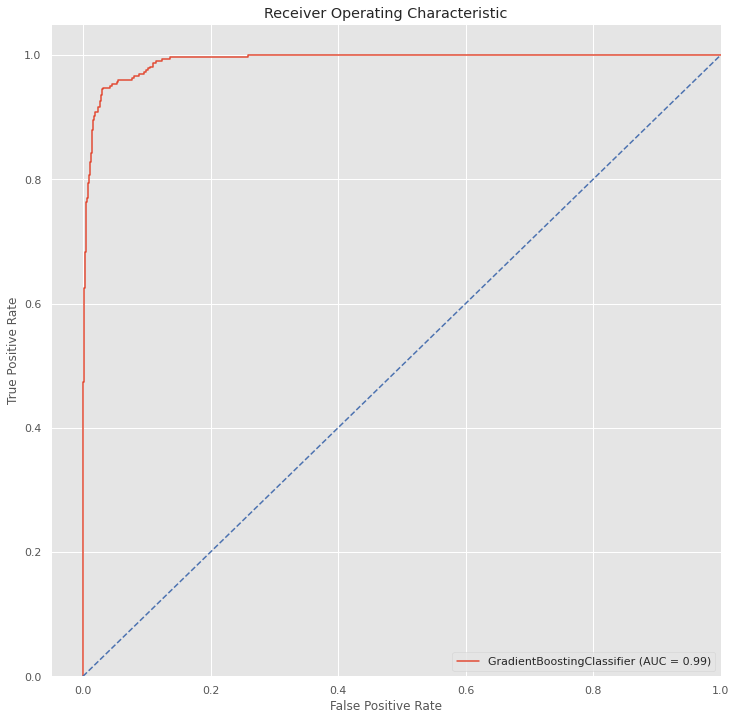

In [ ]:
plot_roc_curve(gbm_tuned_model, X_test, y_test)
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "b--")
plt.xlim([-0.05, 1])
plt.ylim([0, 1.05])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Our model appears to be really good, since the AUC is almost 1.

# Productionizing the model

Now that we have finalized our model, we'll build a model pipeline to streamline all the steps of model building. We'll start will the initial dataset and proceed with the pipeline building steps.

**Set Static variables**

In [ ]:
# The static variables
# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

df_pipe = df.copy()
cat_columns = df_pipe.select_dtypes(include="object").columns.tolist()
df_pipe[cat_columns] = df_pipe[cat_columns].astype("category")
df_pipe.columns = [i.replace(" ", "_").lower() for i in df_pipe.columns]

In [ ]:
df_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

**Dependent and independent variables**

In [ ]:
X = df_pipe.drop(columns=["attrition_flag"])
y = df_pipe["attrition_flag"].map(target_mapper)

**Split data in Train, Validation and Test sets**

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [ ]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0   0.839
1   0.161
Name: attrition_flag, dtype: float64
0   0.839
1   0.161
Name: attrition_flag, dtype: float64
0   0.840
1   0.160
Name: attrition_flag, dtype: float64


**Undersampling the training data since that generalized this model really well**

In [ ]:
under_sample = RandomUnderSampler(random_state=seed)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

**Data processing steps**

In [ ]:
# For dropping columns
columns_to_drop = [
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# One-hot encoding columns
columns_to_encode = [
    "gender",
    "education_level",
    "marital_status",
    "income_category",
    "card_category",
]

# Numerical Columns
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

# Columns for null imputation with Unknown
columns_to_null_imp_unknown = ["education_level", "marital_status"]

# Build the pipeline

We use GBM model in production: 
# Model

gbm_tuned_model = GradientBoostingClassifier(
    n_estimators=700,
    max_features="auto",
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=15,
    random_state=seed,
)

In [ ]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

# Missing value imputation
imputer = FillUnknown()

# To encode the categorical data
one_hot = OneHotEncoder(handle_unknown="ignore")

# To scale numerical columns
scaler = RobustScaler()


# creating a transformer for feature name standardization and dropping columns
cleanser = Pipeline(
    steps=[
        ("feature_name_standardizer", feature_name_standardizer),
        ("column_dropper", column_dropper),
        ("value_mask", value_masker),
        ("imputation", imputer),
    ]
)

# creating a transformer for data encoding

encode_transformer = Pipeline(steps=[("onehot", one_hot)])
num_scaler = Pipeline(steps=[("scale", scaler)])

preprocessor = ColumnTransformer(
    transformers=[
        ("encoding", encode_transformer, columns_to_encode),
        ("scaling", num_scaler, num_columns),
    ],
    remainder="passthrough",
)

# Model

gbm_tuned_model = GradientBoostingClassifier(
    n_estimators=700,
    max_features="auto",
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=15,
    random_state=seed,
)

# Creating new pipeline with best parameters
model_pipe = Pipeline(
    steps=[
        ("cleanse", cleanser),
        ("preprocess", preprocessor),
        ("model", gbm_tuned_model),
    ]
)
# Fit the model on training data
model_pipe.fit(X_train_un, y_train_un)

Pipeline(steps=[('cleanse',
                 Pipeline(steps=[('feature_name_standardizer',
                                  <__main__.FeatureNamesStandardizer object at 0x7f225e6d79d0>),
                                 ('column_dropper',
                                  <__main__.ColumnDropper object at 0x7f225e6d7ed0>),
                                 ('value_mask',
                                  <__main__.CustomValueMasker object at 0x7f22602acc10>),
                                 ('imputation',
                                  <__main__.FillUnknown object at 0x7f22602ac1d0>)])),
                ('preprocess',
                 ColumnTran...
                                                                   RobustScaler())]),
                                                  ['total_relationship_count',
                                                   'months_inactive_12_mon',
                                                   'contacts_count_12_mon',
                     

**Score the pipeline using test data**

**Accuracy**

In [ ]:
print(
    "Accuracy on Test is: {}%".format(round(model_pipe.score(X_test, y_test) * 100, 0))
)

Accuracy on Test is: 94.0%


**Recall Score**

In [ ]:
pred_train_p = model_pipe.predict_proba(X_train_un)[:, 1] > 0.5
pred_test_p = model_pipe.predict_proba(X_test)[:, 1] > 0.5

pred_train_p = np.round(pred_train_p)
pred_test_p = np.round(pred_test_p)

train_acc_p = accuracy_score(pred_train_p, y_train_un)
test_acc_p = accuracy_score(pred_test_p, y_test)

train_recall_p = recall_score(y_train_un, pred_train_p)
test_recall_p = recall_score(y_test, pred_test_p)

In [ ]:
print("Recall on Test is: {}%".format(round(test_recall_p * 100, 0)))

Recall on Test is: 96.0%


**Plotting correlation heatmap of the features**

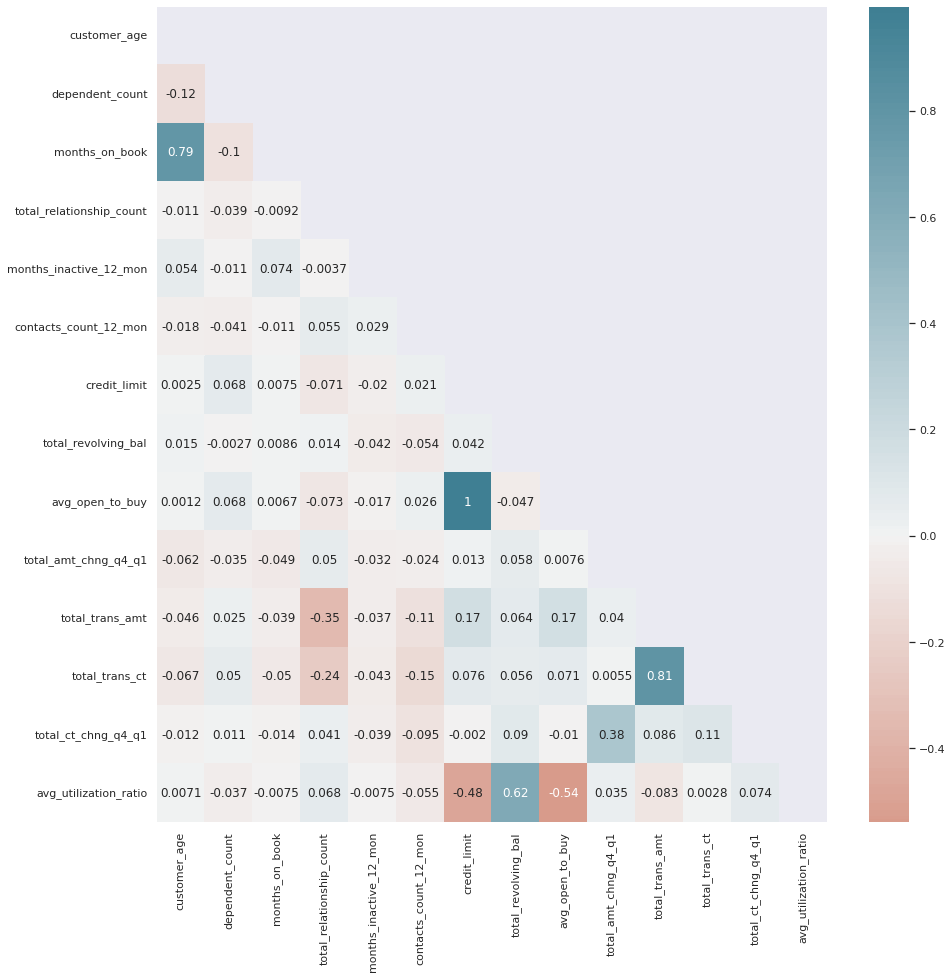

In [ ]:
mask = np.zeros_like(df_pipe.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.set(rc={"figure.figsize": (15, 15)})

sns.heatmap(
    df_pipe.corr(),
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    mask=mask,
    center=0,
)
plt.show()

The most important features to understand customer credit card churn, are: 

1. Total Transaction Count
2. Total Transaction Amount
3. Total Revolving Balance
4. Total Amount Change Q4 to Q1
5. Total Count Change Q4 to Q1
6. Total Relationship Count

# Final Conclusion


- All of these features are negatively correlated with the Attrition Flag, meaning, the lower the values of these features, the higher the chances of a customer to attrite
 
- Bank should connect with the customer more often to increase the connect, and provide the customer with various offers and schemes to increase relationships of the customer with the bank
 
- Bank should offer cashback schemes on credit cards, which might encourage the customers on using the credit card more often
 
- Bank should also offer credit limit increase for the customers who are regularly using the credit card. This should increase the credit card spends/transaction amounts.
 
- 0% interest EMI on credit card is also another offer that can be provided to customers to encourage the customers buy products of higher cost with credit card, and convert the expenditure to EMI, so that total transaction amount as well as transaction counts would increase. The balance would also revolve nicely.
 
- Along with the available types of cards, bank can introduce credit cards specific to online shopping (with % cashback offers) or online food ordering. This way the card will be used more frequently.
 
With our model, we can predict which customers are likely to attrite, and according to the predicted probability, at least top 20-30% customers can be reached out to discuss credit card offers, credit limit increase etc, to try retain those customers.